In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/raw/athlete_events.csv")

In [3]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
df = df.drop(["ID", "Name", "Team", "Games", "City", "Event"], axis=1)

In [5]:
df = df[df["Year"] > 1959]

In [6]:
df['Medal'] = df['Medal'].replace(np.nan, 0)
df['Medal'].unique()
print(f'shape is {df.shape}')

shape is (209072, 9)


In [7]:
df = df.dropna()
print(f'shape is {df.shape}')

shape is (196084, 9)


### Selecting sport categories

### Converting medal names into medal (1) or no medal (0)

In [8]:
df = df.replace(["Gold", "Silver", "Bronze"], 1)

df.Medal.value_counts()

0    168346
1     27738
Name: Medal, dtype: int64

In [9]:
# check most represented sports
df.value_counts('Sport')

Sport
Athletics                    27351
Swimming                     18494
Gymnastics                   17196
Cycling                       7591
Rowing                        7516
Cross Country Skiing          7332
Shooting                      7030
Alpine Skiing                 6159
Fencing                       6087
Canoeing                      5432
Wrestling                     4962
Sailing                       4704
Biathlon                      4615
Ice Hockey                    4389
Equestrianism                 4339
Speed Skating                 4306
Boxing                        4241
Football                      4205
Hockey                        4160
Basketball                    3494
Judo                          3366
Handball                      3317
Volleyball                    3277
Weightlifting                 2852
Water Polo                    2638
Bobsleigh                     2158
Tennis                        1991
Diving                        1951
Ski Jumping   

## Winter Olympics datasets:

In [10]:
# set Event of interst

sport_list = ["Athletics", "Swimming", "Gymnastics"]
# rename_mapper = {
#     "Figure Skating Men's Singles" : "figure_men", 
#     "Figure Skating Women's Singles"  : "figure_wom", 
#     "Speed Skating Men's 1,500 metres" : "speed_man", 
#     "Speed Skating Women's 1,500 metres" : "speed_wom"
# }

In [11]:
setattr# filter main dataset and retrieve only categories of interest
wd_ag = df[df.Sport.isin(sport_list)].copy().reset_index()
# # rename wd_ag events
# wd_ag.replace(rename_mapper, inplace=True)
# create one hot encoding for NOC adn Event cols
noc_one = pd.get_dummies(wd_ag[["NOC", "Sport", "Sex", "Season"]])
#noc_one = pd.get_dummies(wd_ag[["Event"]])
# concat wd_ag and tmp 
tmp = pd.concat([wd_ag, noc_one], axis=1)
# calc BMI
tmp["BMI"] = tmp["Weight"] / ((tmp["Height"] / 100)** 2)
# print examples
tmp.sample(n=10)

,index,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal,...,NOC_YUG,NOC_ZAM,NOC_ZIM,Sport_Athletics,Sport_Gymnastics,Sport_Swimming,Sex_F,Sex_M,Season_Summer,BMI
48138,205559,F,17.0,159.0,52.0,ISR,1984,Summer,Swimming,0,...,0,0,0,0,0,1,1,0,1,20.568807
48307,206259,M,27.0,182.0,78.0,GER,2004,Summer,Swimming,0,...,0,0,0,0,0,1,0,1,1,23.547881
3649,14886,M,23.0,165.0,67.0,GUY,1984,Summer,Athletics,0,...,0,0,0,1,0,0,0,1,1,24.609734
39670,168812,F,22.0,170.0,58.0,URS,1980,Summer,Athletics,0,...,0,0,0,1,0,0,1,0,1,20.069204
10747,43799,M,24.0,167.0,67.0,ESP,2004,Summer,Gymnastics,0,...,0,0,0,0,1,0,0,1,1,24.023809
35900,154342,F,18.0,165.0,57.0,CAN,1972,Summer,Gymnastics,0,...,0,0,0,0,1,0,1,0,1,20.936639
61981,266326,M,24.0,165.0,56.0,USA,1976,Summer,Gymnastics,0,...,0,0,0,0,1,0,0,1,1,20.569330
48493,206939,F,29.0,165.0,54.0,POL,1996,Summer,Athletics,0,...,0,0,0,1,0,0,1,0,1,19.834711
44905,191688,F,17.0,161.0,48.0,TCH,1976,Summer,Gymnastics,0,...,0,0,0,0,1,0,1,0,1,18.517804
42075,179107,F,28.0,178.0,70.0,DEN,2016,Summer,Swimming,0,...,0,0,0,0,0,1,1,0,1,22.093170


In [12]:
# men_skating = tmp[tmp.Event =="Figure Skating Men's Singles"]
# print(f'men_skating shape is\t{men_skating.shape}')
# women_skating = tmp[tmp.Event =="Figure Skating Women's Singles"]
# print(f'women_skating shape is\t{women_skating.shape}')
# men_speed_skating = tmp[tmp.Event =="Speed Skating Men's 1,500 metres"]
# print(f'men_speed_skating shape is\t{men_speed_skating.shape}')
# women_speed_skating = tmp[tmp.Event =="Speed Skating Women's 1,500 metres"]
# print(f'women_speed_skating shape is\t{women_speed_skating.shape}')

### AutoML

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder


## Random forest feature importance:

### 1. graph from the presentation based on age, year, country, sport, sex (sex_m, sex_f), season, and bmi: 

Note: sex and season are categorical variables, therefore they were one hot encoded into new columns (Sex_F,	Sex_M, and	Season_Summer). For this reason, we need to drop the original categorical sex and season columns.

In [14]:
X = tmp.drop(["Medal", "Sport", "NOC", "Height", "Weight", "index", "Sex", "Season"], axis=1)
print(f'X shape is {X.shape}\tcols are { ";".join(X.columns)}')
# create labels
y = tmp['Medal']
print(f'y shape is {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(f'X_train shape is {X_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_test shape is {y_test.shape}')

X shape is (63041, 229)	cols are Age;Year;NOC_AFG;NOC_AHO;NOC_ALB;NOC_ALG;NOC_AND;NOC_ANG;NOC_ANT;NOC_ARG;NOC_ARM;NOC_ARU;NOC_ASA;NOC_AUS;NOC_AUT;NOC_AZE;NOC_BAH;NOC_BAN;NOC_BAR;NOC_BDI;NOC_BEL;NOC_BEN;NOC_BER;NOC_BIH;NOC_BIZ;NOC_BLR;NOC_BOL;NOC_BOT;NOC_BRA;NOC_BRN;NOC_BRU;NOC_BUL;NOC_BUR;NOC_CAF;NOC_CAM;NOC_CAN;NOC_CAY;NOC_CGO;NOC_CHA;NOC_CHI;NOC_CHN;NOC_CIV;NOC_CMR;NOC_COD;NOC_COK;NOC_COL;NOC_COM;NOC_CPV;NOC_CRC;NOC_CRO;NOC_CUB;NOC_CYP;NOC_CZE;NOC_DEN;NOC_DJI;NOC_DMA;NOC_DOM;NOC_ECU;NOC_EGY;NOC_ERI;NOC_ESA;NOC_ESP;NOC_EST;NOC_ETH;NOC_EUN;NOC_FIJ;NOC_FIN;NOC_FRA;NOC_FRG;NOC_FSM;NOC_GAB;NOC_GAM;NOC_GBR;NOC_GBS;NOC_GDR;NOC_GEO;NOC_GEQ;NOC_GER;NOC_GHA;NOC_GRE;NOC_GRN;NOC_GUA;NOC_GUI;NOC_GUM;NOC_GUY;NOC_HAI;NOC_HKG;NOC_HON;NOC_HUN;NOC_INA;NOC_IND;NOC_IOA;NOC_IRI;NOC_IRL;NOC_IRQ;NOC_ISL;NOC_ISR;NOC_ISV;NOC_ITA;NOC_IVB;NOC_JAM;NOC_JOR;NOC_JPN;NOC_KAZ;NOC_KEN;NOC_KGZ;NOC_KIR;NOC_KOR;NOC_KOS;NOC_KSA;NOC_KUW;NOC_LAO;NOC_LAT;NOC_LBA;NOC_LBR;NOC_LCA;NOC_LES;NOC_LIB;NOC_LIE;NOC_LTU;NOC_LUX;NOC_MA

In [15]:
X.head()

,Age,Year,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,NOC_ANT,NOC_ARG,...,NOC_YUG,NOC_ZAM,NOC_ZIM,Sport_Athletics,Sport_Gymnastics,Sport_Swimming,Sex_F,Sex_M,Season_Summer,BMI
0,31.0,2000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,36.393158
1,30.0,2012,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,21.733535
2,21.0,1996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,20.724838
3,21.0,1996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,20.724838
4,21.0,1996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,20.724838


In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_final = RandomForestClassifier(max_depth=200, random_state=42)
clf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, random_state=42)

In [17]:
predictions_all_countr = clf_final.predict(X_test)

0.9066539773177889
0.48846153846153845


<AxesSubplot:>

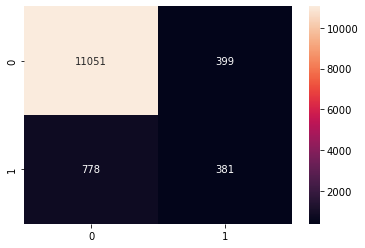

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
cm_final = confusion_matrix(y_test, predictions_all_countr)
#tn, fp, fn, tp = confusion_matrix(wdf_dict['y_test'], wdf_dict['predictions_sk']).ravel()
#print(tn, fp, fn, tp )
print(accuracy_score(y_test, predictions_all_countr))
print(precision_score(y_test, predictions_all_countr))
import seaborn as sns
sns.heatmap(cm_final, annot=True, fmt='d')

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions_all_countr, average="macro")

0.671212742102931

BMI is the most important feature:

<AxesSubplot:>

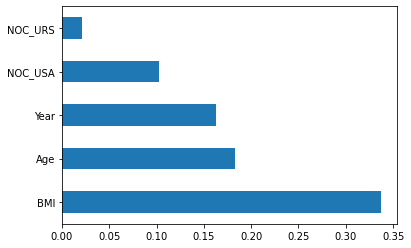

In [24]:
feat_importances = pd.Series(clf_final.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

### 2. graph from the presentation based on age, bmi, and sports: 

Removing features results in lower performace and lower success in discovering medal winners:

In [25]:
X = tmp[["Age","BMI","Sport_Athletics",	"Sport_Gymnastics",	"Sport_Swimming"]]
print(f'X shape is {X.shape}\tcols are { ";".join(X.columns)}')
# create labels
y = tmp['Medal']
print(f'y shape is {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(f'X_train shape is {X_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_test shape is {y_test.shape}')

X shape is (63041, 5)	cols are Age;BMI;Sport_Athletics;Sport_Gymnastics;Sport_Swimming
y shape is (63041,)
X_train shape is (50432, 5)
y_train shape is (50432,)
X_test shape is (12609, 5)
y_test shape is (12609,)


In [26]:
X.head()

,Age,BMI,Sport_Athletics,Sport_Gymnastics,Sport_Swimming
0,31.0,36.393158,1,0,0
1,30.0,21.733535,1,0,0
2,21.0,20.724838,0,0,1
3,21.0,20.724838,0,0,1
4,21.0,20.724838,0,0,1


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf_final = RandomForestClassifier(max_depth=200, random_state=42)
clf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, random_state=42)

In [28]:
predictions_all_countr = clf_final.predict(X_test)

0.8892061226108335
0.3068181818181818


<AxesSubplot:>

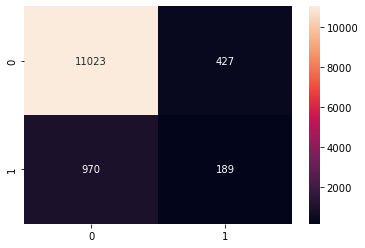

In [29]:
cm_final = confusion_matrix(y_test, predictions_all_countr)
#tn, fp, fn, tp = confusion_matrix(wdf_dict['y_test'], wdf_dict['predictions_sk']).ravel()
#print(tn, fp, fn, tp )
print(accuracy_score(y_test, predictions_all_countr))
print(precision_score(y_test, predictions_all_countr))

sns.heatmap(cm_final, annot=True, fmt='d')

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions_all_countr, average="macro")

0.576683198624413

We can see that sport category has very low feature importance:

<AxesSubplot:>

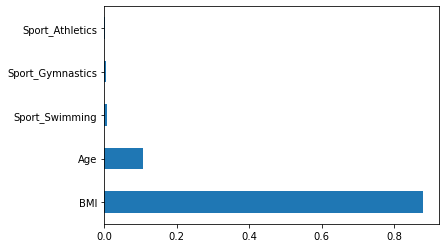

In [32]:
feat_importances = pd.Series(clf_final.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')